<a href="https://colab.research.google.com/github/manasamorthad/Machine-Learning/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implement K- means algorithm to find the clusters. (also demonstrate with elbow method)

--- K-Means Clustering ---
First 5 data points and their cluster labels: 
[(array([-9.1139443 ,  6.81361629]), np.int32(3)), (array([-9.35457578,  7.09278959]), np.int32(3)), (array([-2.01567068,  8.28177994]), np.int32(0)), (array([-7.01023591, -6.22084348]), np.int32(1)), (array([-10.06120248,   6.71867113]), np.int32(3))]


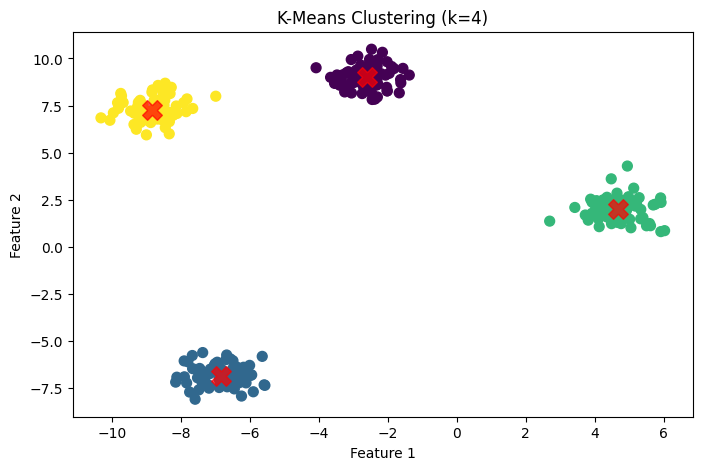

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 1. Generate sample data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# 2. K-Means Implementation
print("--- K-Means Clustering ---")
k_optimal = 4 # Known optimal for this generated data
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
kmeans.fit(X)

# Predict the cluster labels
labels = kmeans.predict(X)

# Display results (first 5 points)
print(f"First 5 data points and their cluster labels: \n{list(zip(X[:5], labels[:5]))}")

# Plotting the clusters
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7, marker='X')
plt.title(f'K-Means Clustering (k={k_optimal})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()



--- Elbow Method Demonstration ---


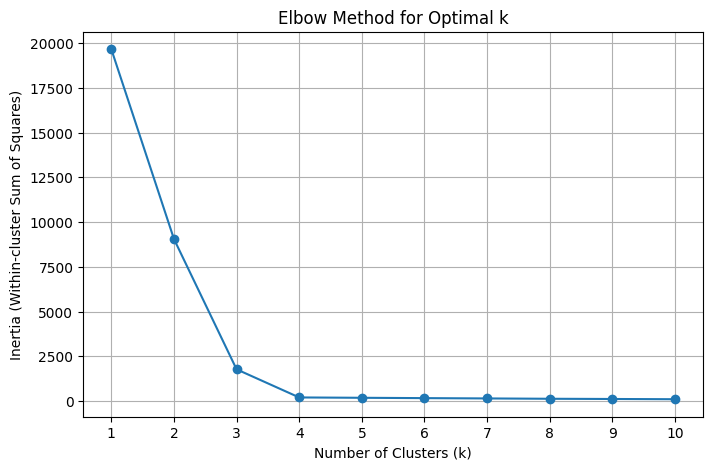


Interpretation:
The 'elbow' in the plot (where the decrease in inertia starts to slow down significantly) indicates the suggested optimal number of clusters, which appears to be k=4.


In [ ]:
# 3. Elbow Method Demonstration
print("\n--- Elbow Method Demonstration ---")
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans_k = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_k.fit(X)
    inertia.append(kmeans_k.inertia_) # Sum of squared distances of samples to their closest cluster center

# Plotting the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.xticks(K_range)
plt.grid(True)
plt.show()

# Interpretation
print("\nInterpretation:")
print("The 'elbow' in the plot (where the decrease in inertia starts to slow down significantly) indicates the suggested optimal number of clusters, which appears to be k=4.")

Implement all the clustering distance measures (similarity measures)
I. Euclidean distance
ii. Manhattan distance
iii. cosine similarity
iv. minkowski
v. jaccard index

In [ ]:
from scipy.spatial.distance import euclidean, cityblock, minkowski, jaccard
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Sample vectors
A = np.array([1, 2, 3, 4])
B = np.array([5, 6, 7, 8])
C = np.array([1, 1, 0, 0]) # Binary for Jaccard
D = np.array([0, 1, 1, 0])

print("--- Clustering Distance Measures ---")
print(f"Vector A: {A}, Vector B: {B}")

# I. Euclidean Distance
dist_euclidean = euclidean(A, B)
print(f"I. Euclidean Distance: {dist_euclidean:.4f}")

# II. Manhattan Distance (L1 Norm)
dist_manhattan = cityblock(A, B)
print(f"II. Manhattan Distance: {dist_manhattan:.4f}")

# III. Cosine Similarity
sim_cosine = cosine_similarity(A.reshape(1, -1), B.reshape(1, -1))[0][0]
print(f"III. Cosine Similarity: {sim_cosine:.4f}")

# IV. Minkowski Distance
p_val = 3 # Example p value
dist_minkowski = minkowski(A, B, p=p_val)
print(f"IV. Minkowski Distance (p={p_val}): {dist_minkowski:.4f}")

# V. Jaccard Index (for binary/set data)
print(f"\nVector C (Binary): {C}, Vector D (Binary): {D}")
sim_jaccard = 1 - jaccard(C, D) # scipy.spatial.distance.jaccard returns the distance (1-similarity)
print(f"V. Jaccard Index (Similarity): {sim_jaccard:.4f}")

--- Clustering Distance Measures ---
Vector A: [1 2 3 4], Vector B: [5 6 7 8]
I. Euclidean Distance: 8.0000
II. Manhattan Distance: 16.0000
III. Cosine Similarity: 0.9689
IV. Minkowski Distance (p=3): 6.3496

Vector C (Binary): [1 1 0 0], Vector D (Binary): [0 1 1 0]
V. Jaccard Index (Similarity): 0.3333


Implement hierarchical clustering
I. agglomerative (BIRCH and CHAMELEON)
ii. Divisive

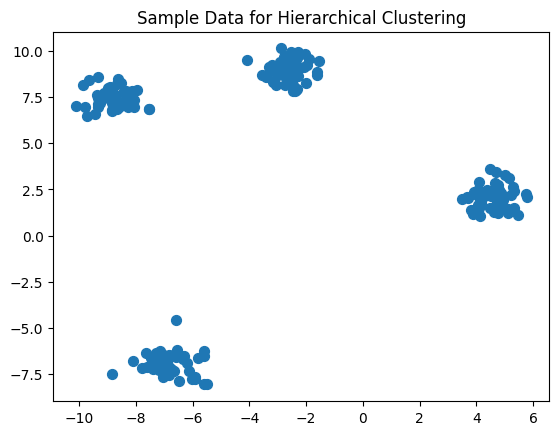

In [ ]:
from sklearn.cluster import AgglomerativeClustering, Birch
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
X, y = make_blobs(n_samples=200, centers=4, random_state=42, cluster_std=0.6)

plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Sample Data for Hierarchical Clustering")
plt.show()

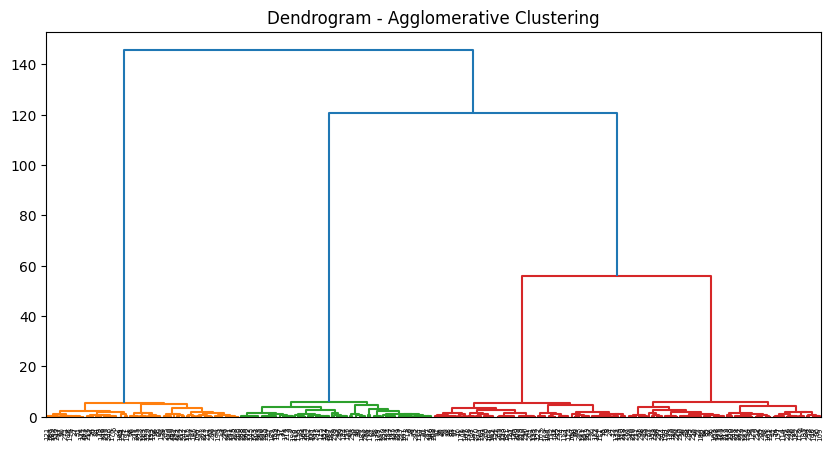

In [ ]:
# Dendrogram for Agglomerative
Z = linkage(X, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrogram - Agglomerative Clustering')
plt.show()

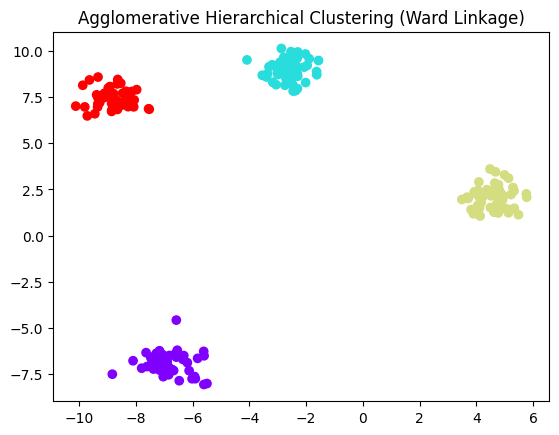

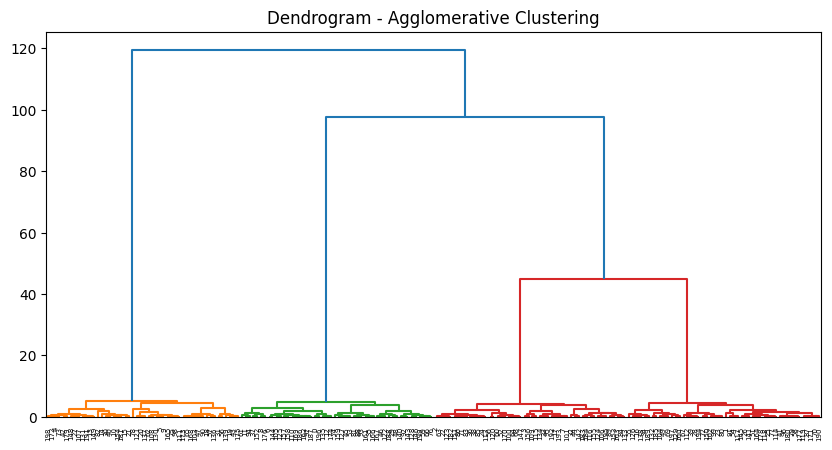

In [ ]:
agg = AgglomerativeClustering(n_clusters=4, linkage='ward')
labels_agg = agg.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels_agg, cmap='rainbow')
plt.title("Agglomerative Hierarchical Clustering (Ward Linkage)")
plt.show()


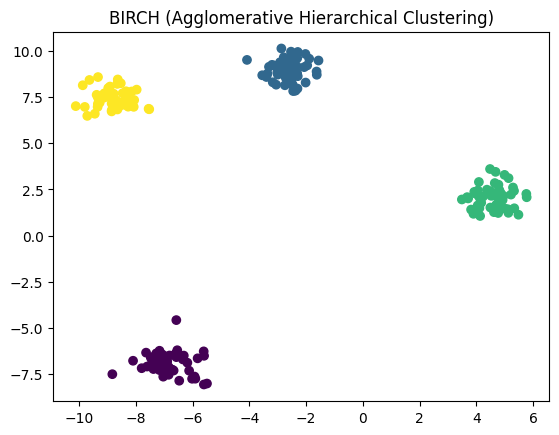

In [ ]:
from sklearn.cluster import Birch

birch = Birch(n_clusters=4)
labels_birch = birch.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels_birch, cmap='viridis')
plt.title("BIRCH (Agglomerative Hierarchical Clustering)")
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/cluster/_agglomerative.py:325: UserWarning: the number of connected components of the connectivity matrix is 4 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


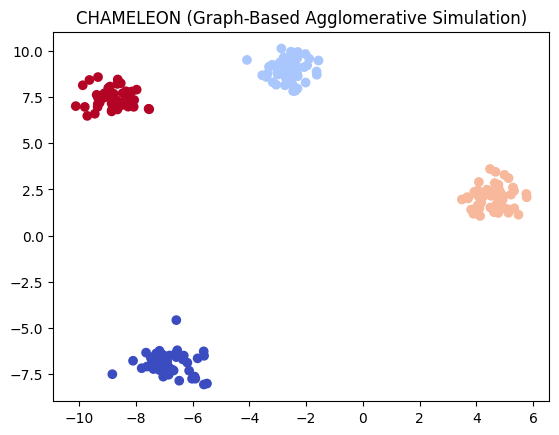

In [ ]:
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import AgglomerativeClustering

# Step 1: Build KNN graph
knn_graph = kneighbors_graph(X, n_neighbors=10, include_self=False)

# Step 2: Perform Agglomerative clustering on graph structure
chameleon_sim = AgglomerativeClustering(
    n_clusters=4,
    connectivity=knn_graph,
    linkage='ward'
)
labels_cham = chameleon_sim.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels_cham, cmap='coolwarm')
plt.title("CHAMELEON (Graph-Based Agglomerative Simulation)")
plt.show()


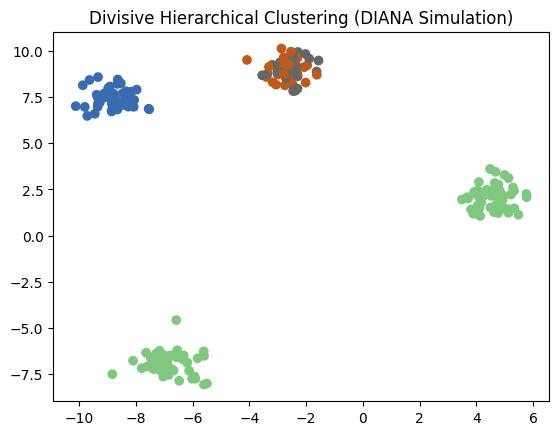

In [ ]:
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans

def divisive_clustering(X, n_clusters=4):
    clusters = [X]
    labels = np.zeros(len(X), dtype=int)
    current_label = 0

    while len(clusters) < n_clusters:
        # Find cluster with max variance
        max_var_cluster_idx = np.argmax([np.var(c) for c in clusters])
        data_to_split = clusters.pop(max_var_cluster_idx)

        # Split using KMeans into 2 subclusters
        km = KMeans(n_clusters=2, random_state=42)
        sub_labels = km.fit_predict(data_to_split)

        # Assign labels
        labels_part = (labels == current_label)
        labels[labels_part] = sub_labels + current_label * 2

        # Add new clusters
        clusters.append(data_to_split[sub_labels == 0])
        clusters.append(data_to_split[sub_labels == 1])

        current_label += 1

    return labels

labels_div = divisive_clustering(X, n_clusters=4)

plt.scatter(X[:, 0], X[:, 1], c=labels_div, cmap='Accent')
plt.title("Divisive Hierarchical Clustering (DIANA Simulation)")
plt.show()


Implement Types of Linkages
Single Linkage
Complete Linkage
Average Linkage
Ward's Linkage
Centroid-Linkage

--- Hierarchical Clustering & Linkages ---
Sample Data: 
[[1 2]
 [1 4]
 [1 0]
 [4 2]
 [4 4]
 [4 0]]


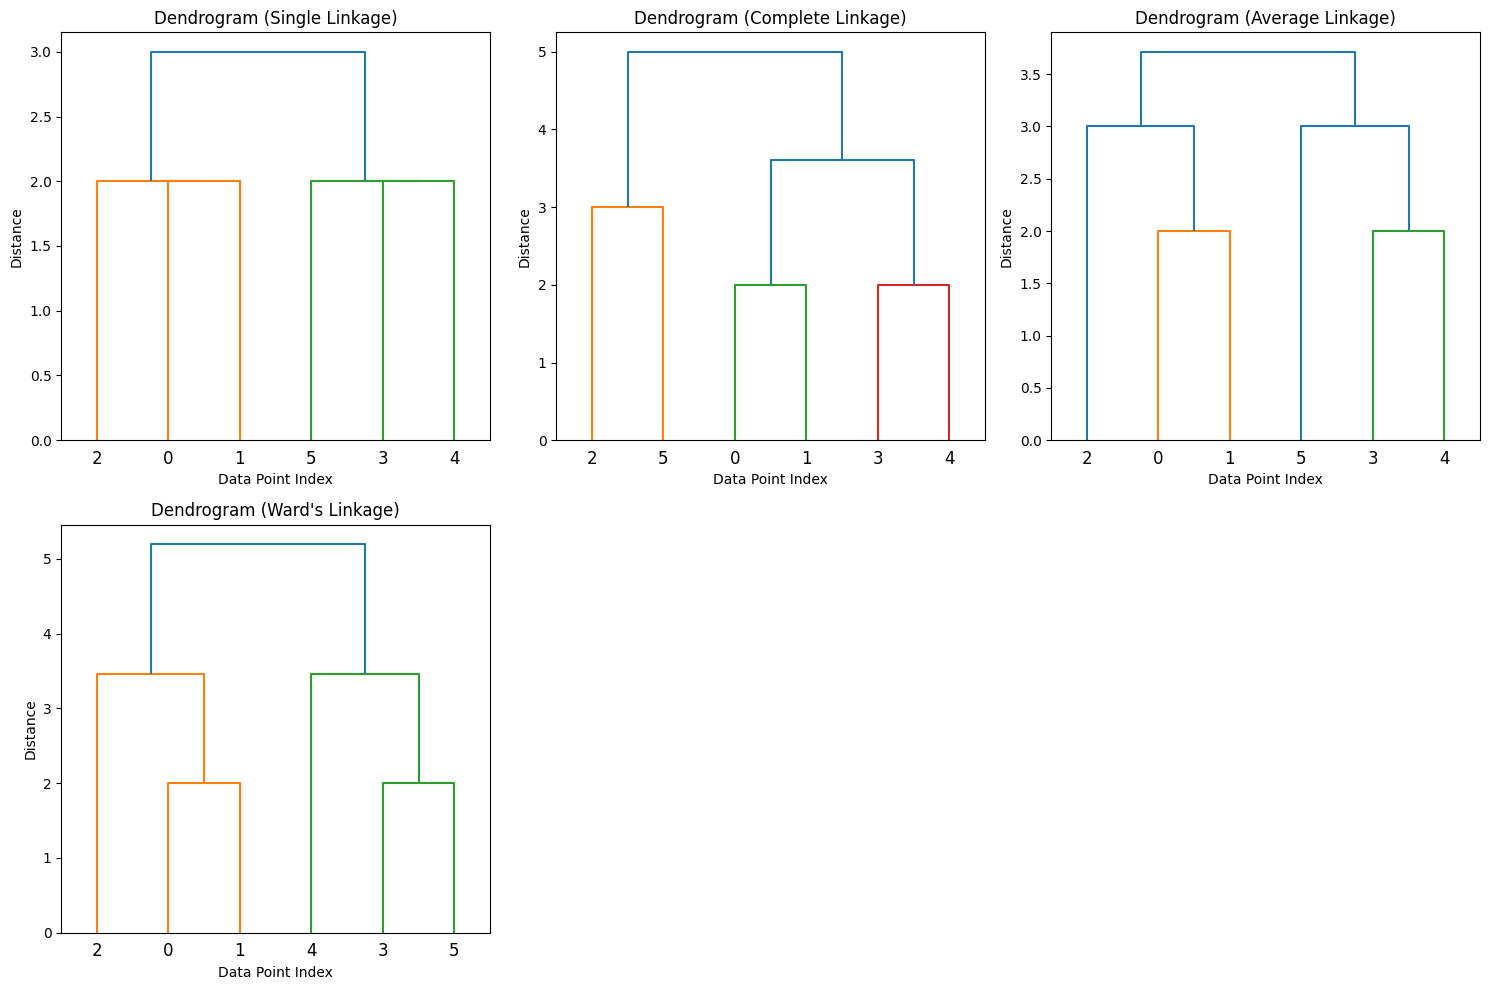

In [ ]:

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, Birch
import matplotlib.pyplot as plt
import numpy as np

# Sample data
X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])

print("--- Hierarchical Clustering & Linkages ---")
print(f"Sample Data: \n{X}")

## Part I. Agglomerative (Types of Linkages)

# Linkage Types Implementation
linkage_types = {
    'Single Linkage': 'single',
    'Complete Linkage': 'complete',
    'Average Linkage': 'average',
    'Ward\'s Linkage': 'ward',
    # Centroid-Linkage is generally done with 'median' or 'centroid' in scipy,
    # but 'ward' is often preferred and available in scikit-learn
}

plt.figure(figsize=(15, 10))
i = 1
for name, method in linkage_types.items():
    if method == 'ward': # Ward's requires Euclidean distance
        Z = linkage(X, method=method, metric='euclidean')
    else:
        Z = linkage(X, method=method, metric='euclidean')

    plt.subplot(2, 3, i)
    plt.title(f'Dendrogram ({name})')
    dendrogram(Z)
    plt.xlabel('Data Point Index')
    plt.ylabel('Distance')
    i += 1

plt.tight_layout()
plt.show()

Implement DBSCAN clustering

--- DBSCAN Clustering ---
DBSCAN Labels (first 20): [0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0]
Number of clusters found (excluding noise): 2
Number of noise points (-1 label): 0


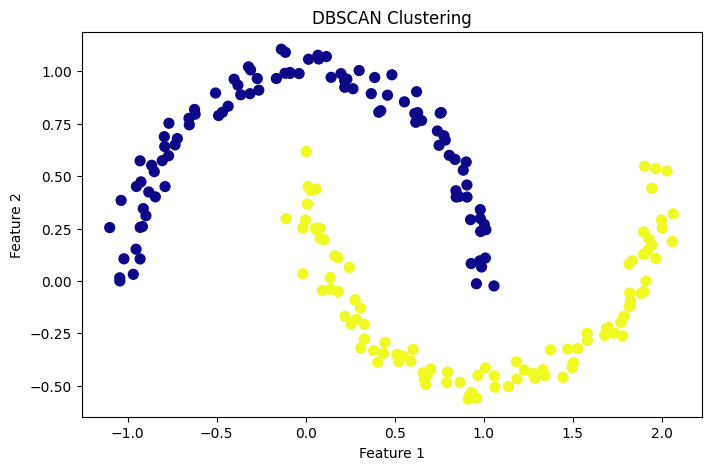

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

# Sample data (good for DBSCAN)
X, _ = make_moons(n_samples=200, noise=0.05, random_state=42)

print("--- DBSCAN Clustering ---")

dbscan = DBSCAN(eps=0.3, min_samples=5)
labels_dbscan = dbscan.fit_predict(X)

# Labels include -1 for noise points
print(f"DBSCAN Labels (first 20): {labels_dbscan[:20]}")
print(f"Number of clusters found (excluding noise): {len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)}")
print(f"Number of noise points (-1 label): {np.sum(labels_dbscan == -1)}")

# Plotting DBSCAN results
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels_dbscan, s=50, cmap='plasma')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Implement Spectral Clustering

--- Spectral Clustering ---
Spectral Clustering Labels (first 20): [0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0]


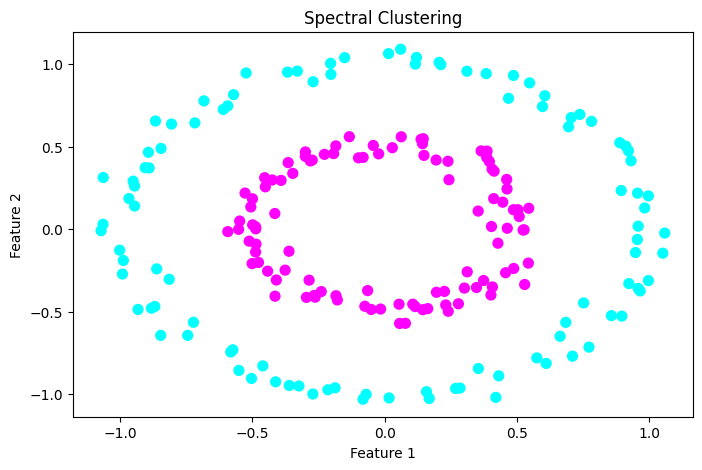

In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np

# Sample data (good for Spectral Clustering)
X, _ = make_circles(n_samples=200, factor=0.5, noise=0.05, random_state=42)

print("--- Spectral Clustering ---")

# Spectral Clustering Implementation
# n_clusters: The number of clusters to form.
# affinity: How to construct the affinity matrix ('nearest_neighbors' or a custom kernel like 'rbf').
spectral = SpectralClustering(n_clusters=2,
                              assign_labels='kmeans', # Method to assign final labels
                              random_state=42,
                              affinity='nearest_neighbors')
labels_spectral = spectral.fit_predict(X)

print(f"Spectral Clustering Labels (first 20): {labels_spectral[:20]}")

# Plotting Spectral Clustering results
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels_spectral, s=50, cmap='cool')
plt.title('Spectral Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()